# Machine Learning in Clinical Diagnosis
- def Clinical Diagnosis: diagnosis based on signs, symptoms, and laboratory findings during life.
- def Machine Learning: Machine learning is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tabular Data

In [ ]:
import zipfile

In [ ]:
zip = zipfile.ZipFile('drive/MyDrive/My_Data/Cardiovascular_Disease_Dataset.zip')
zip.extractall()
zip.close()

In [ ]:
df = pd.read_csv('cardio_train.csv', sep=';')
df = df.drop('id', axis=1)
print(df.shape)
df.head()

(70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


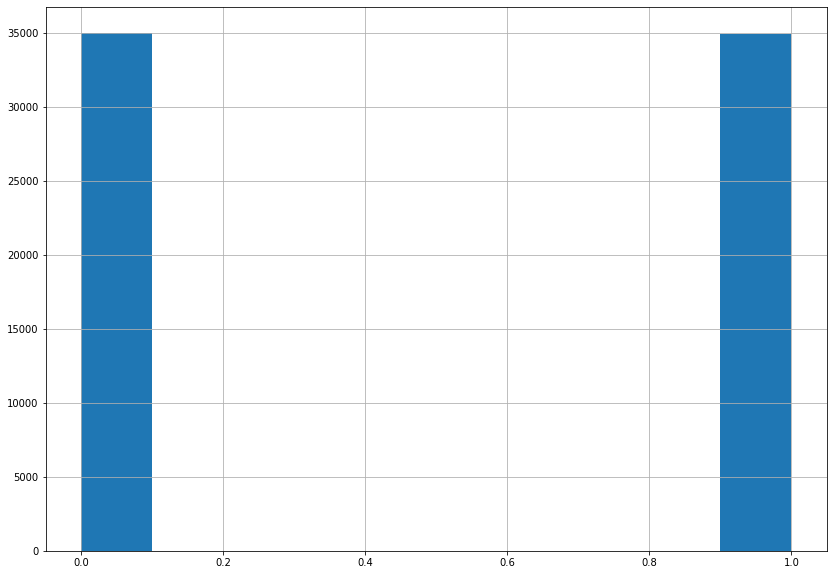

In [ ]:
df.cardio.hist(figsize=(14,10));

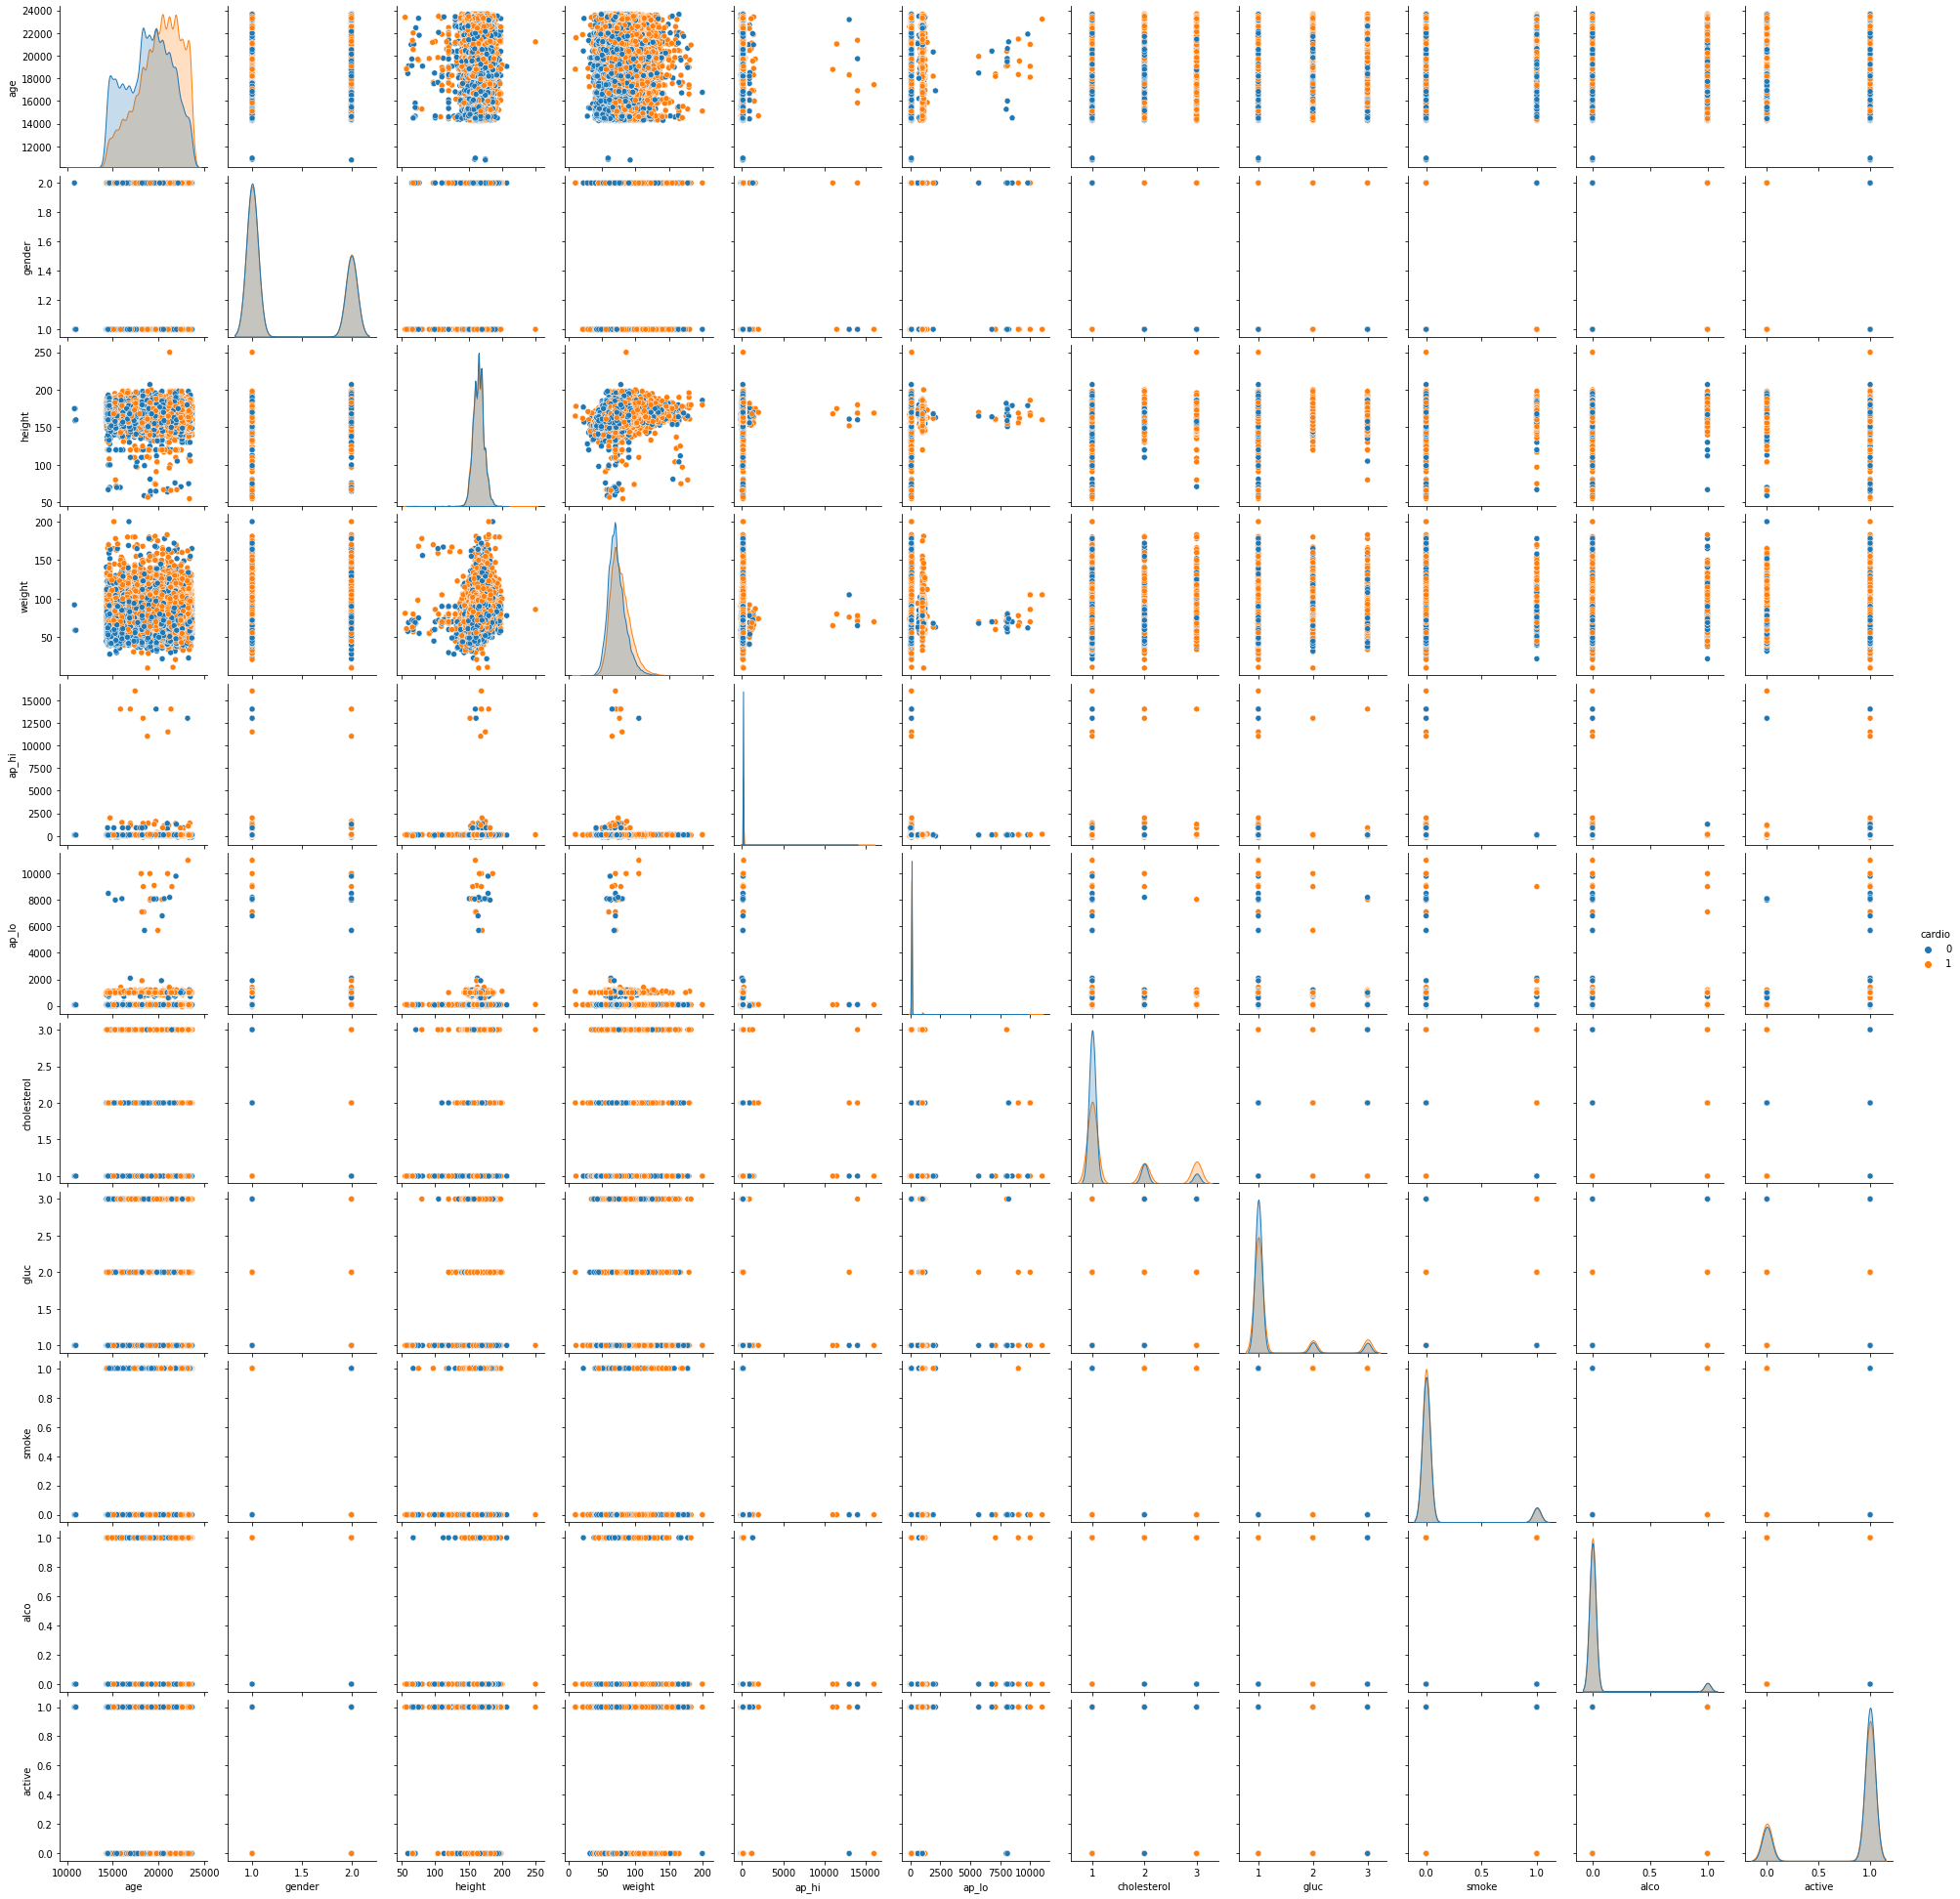

In [ ]:
sns.pairplot(data=df, hue='cardio')
plt.savefig('drive/MyDrive/My_Data/Plots/01_Cardio_pairplot.jpg');

# Data Inspection
- First conclusion would be that even simple data with just 11 "independent" variables could lead to a very complicated analysis
- This could be time consuming with no guarantee of a favorable or precise conclusion

One benefit of ML in medical diagnostics could be the ability to reduce the dimensionality of data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
X, y = df.drop('cardio', axis = 1), df.cardio

In [ ]:
X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


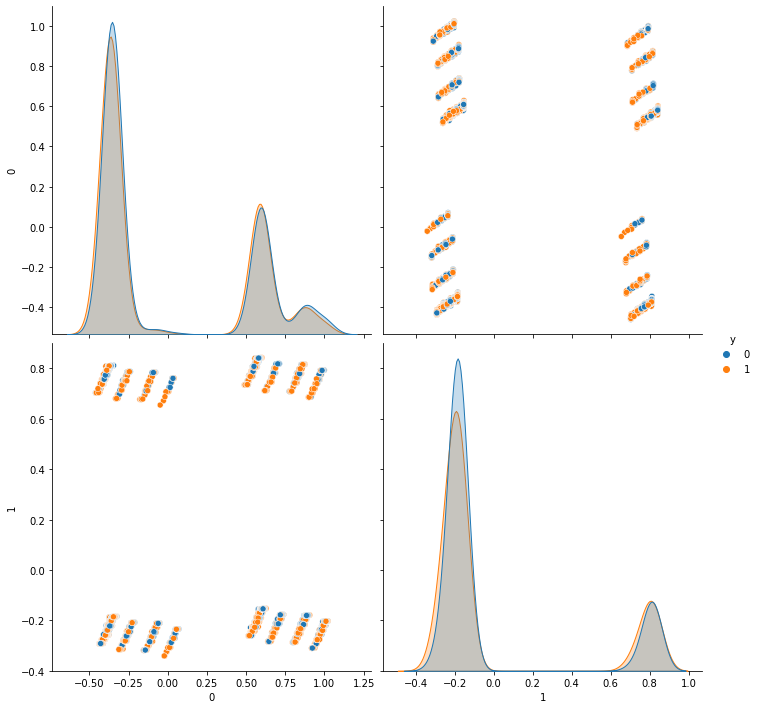

In [ ]:
X_reduced = pd.DataFrame(PCA(n_components=2).fit_transform(X_scaled))
X_reduced['y']=y
sns.pairplot(data=X_reduced, hue='y', height=5);
plt.savefig('drive/MyDrive/My_Data/Plots/02_Cardio_pairplot.jpg');

In [ ]:
from sklearn.model_selection import train_test_split
np.random.RandomState(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['rand_var']= np.random.randn(X_train.shape[0])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid={
    'loss': ['deviance', 'exponential']
    , 'learning_rate': np.arange(0.01,0.2, step =0.04)
    , 'n_estimators': np.arange(50,200, step =40)
    , 'max_features' : ['auto', 'sqrt', 'log2']
}
estimator = GradientBoostingClassifier()
grid = GridSearchCV(estimator=estimator
                    , param_grid=param_grid
                    , scoring='accuracy'
                    , cv=4
                    , verbose=2)
grid.fit(X_train, y_train)

In [ ]:
# help(GradientBoostingClassifier)
# help(GridSearchCV)

In [ ]:
param_grid={
    'loss': ['deviance', 'exponential']
    , 'learning_rate': np.arange(0.01,0.2, step =0.04)
    , 'n_estimators': np.arange(50,200, step =40)
    , 'max_features' : ['auto', 'sqrt', 'log2']
}
estimator = GradientBoostingClassifier()
grid = GridSearchCV(estimator=estimator
                    , param_grid=param_grid
                    , scoring='accuracy'
                    , cv=4
                    , verbose=2)

In [ ]:
from joblib import dump, load
grid.fit(X_train, y_train)
dump(value=grid, filename='drive/MyDrive/My_Data/My_Models/grid_model.joblib')
grid = load(filename='drive/MyDrive/My_Data/My_Models/grid_model.joblib')

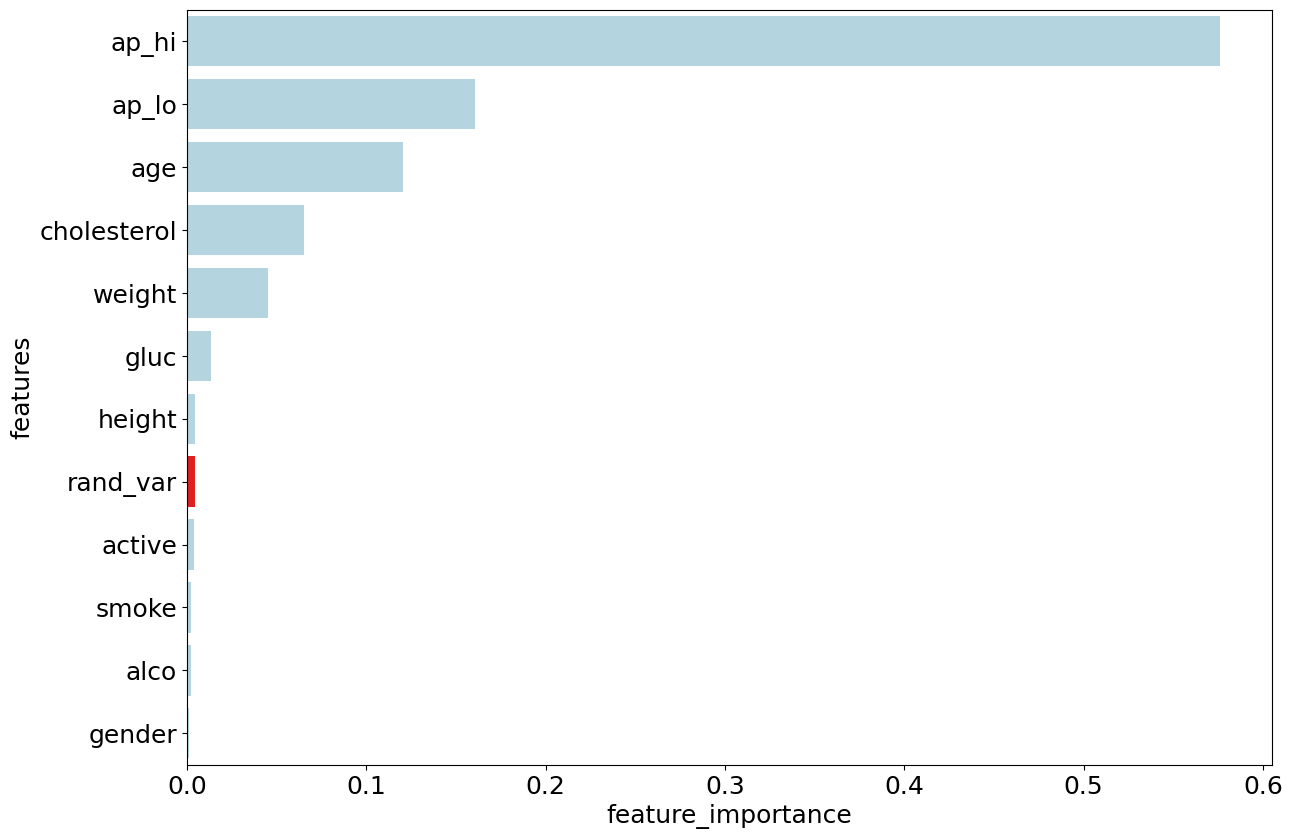

In [ ]:
feature_importance = pd.DataFrame(
    {'features': X_train.columns
     , 'feature_importance': grid.best_estimator_.feature_importances_}).sort_values(by='feature_importance', ascending=False)

palette=['lightblue' if x!='rand_var' else 'red' for x in feature_importance.features]

plt.figure(figsize=(14,10)
, dpi=100
)

plt.rc('font', size=18)

sns.barplot(x = feature_importance.feature_importance
            , y = feature_importance.features
            , palette=palette)

plt.savefig('drive/MyDrive/My_Data/Plots/03_Cardio_Feature.jpg');

In [ ]:
X_test['rand_var']= np.random.randn(X_test.shape[0])
y_pred = grid.predict(X_test)

In [ ]:
def classification_result(y_true, y_pred):

  from sklearn.metrics import classification_report, confusion_matrix

  print(classification_report(y_true, y_pred))

  plt.figure(figsize=(8,8), dpi=80)
  sns.heatmap(confusion_matrix(y_true, y_pred)/y_true.shape[0], annot=True)
  plt.ylabel('True Values')
  plt.xlabel('Predicted Values');

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     11506
           1       0.76      0.69      0.73     11594

    accuracy                           0.74     23100
   macro avg       0.74      0.74      0.74     23100
weighted avg       0.74      0.74      0.74     23100



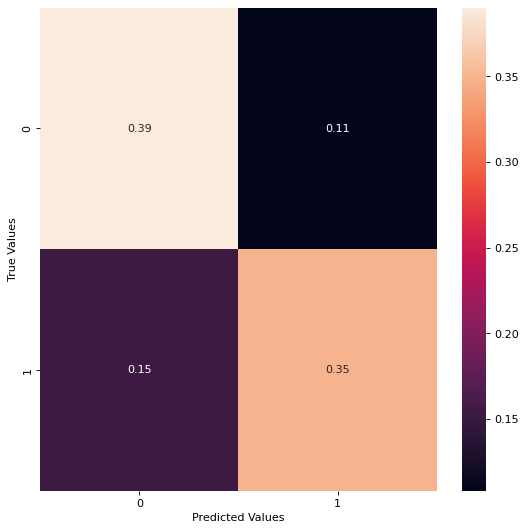

In [ ]:
classification_result(y_test, y_pred)
plt.savefig('drive/MyDrive/My_Data/Plots/04_Cardio_Classification.jpg')

## Image Data

In [ ]:
zip = zipfile.ZipFile('drive/MyDrive/My_Data/Chest_XRAY.zip')
zip.extractall()
zip.close()
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.models import load_model

In [ ]:
def rand_image(location):
  import matplotlib.image as mpimg
  import os
  dirs = os.listdir(location)
  img = np.random.choice(dirs)
  read_img = mpimg.imread(location+img)
  print(img)
  plt.figure(figsize=(10,10))
  plt.imshow(read_img, cmap='bone')
  plt.axis('off');

person310_bacteria_1450.jpeg


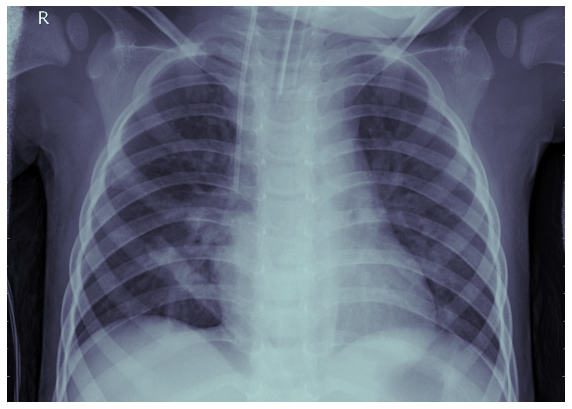

In [ ]:
rand_image('chest_xray/train/PNEUMONIA/')
plt.savefig('drive/MyDrive/My_Data/Plots/04_Pneumonia.jpg')

NORMAL2-IM-1206-0001.jpeg


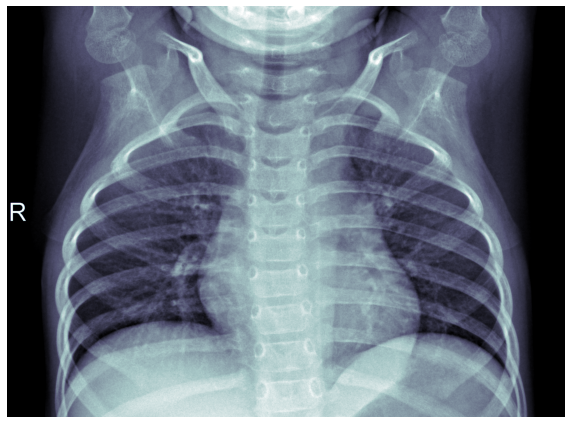

In [ ]:
rand_image('chest_xray/train/NORMAL/')
plt.savefig('drive/MyDrive/My_Data/Plots/04_Normal.jpg')

In [ ]:
seed = 42
tf.random.set_seed(seed)

train_path='chest_xray/train/'
val_path='chest_xray/val/'
test_path='chest_xray/test/'

train_datagen=ImageDataGenerator(rescale=1./255
                                 , rotation_range=0.3
                                 , width_shift_range=0.3
                                 , height_shift_range=0.3
                                 , shear_range=0.3
                                 , zoom_range=0.3
                                 , horizontal_flip=True
                                 , vertical_flip=True 
                                 )
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_path
                                               , batch_size=32
                                               , target_size=(224,224)
                                               , class_mode='binary'
                                               , seed = seed)

val_data = train_datagen.flow_from_directory(directory=val_path
                                               , batch_size=32
                                               , target_size=(224,224)
                                               , class_mode='binary'
                                               , seed = seed)

test_data = train_datagen.flow_from_directory(directory=test_path
                                               , batch_size=32
                                               , target_size=(224,224)
                                               , class_mode='binary'
                                               , seed = seed)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model_1 = Sequential( [
                     Conv2D(filters=10, kernel_size=3, activation ='relu', input_shape = (224,224,3))
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid')
                     , Flatten()
                     , Dense(units=30, activation='relu')
                     , Dropout(rate=0.3)
                     , Dense(units=1, activation='sigmoid')
] )

model_1.compile(loss=BinaryCrossentropy()
                , optimizer=Adam()
                , metrics=['accuracy'])

history = model_1.fit(train_data
                    , validation_data=val_data
                    , epochs=5
                    , workers = 16
                    , use_multiprocessing=True
                    , steps_per_epoch=len(train_data)
                    , validation_steps = len(val_data))

model_1.save('drive/MyDrive/My_Data/My_Models/model_1.h5')
model_1 = load_model('drive/MyDrive/My_Data/My_Models/model_1.h5')

In [ ]:
model_1.evaluate(test_data)

20/20 [==============================] - 17s 306ms/step - loss: 0.8531 - accuracy: 0.8029


[0.853112518787384, 0.8028846383094788]

In [ ]:
y_true = test_data.classes[test_data.index_array]
y_pred = model_1.predict(test_data).round().reshape(y_true.shape)

              precision    recall  f1-score   support

           0       0.94      0.50      0.66       234
           1       0.77      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.76       624
weighted avg       0.83      0.80      0.79       624



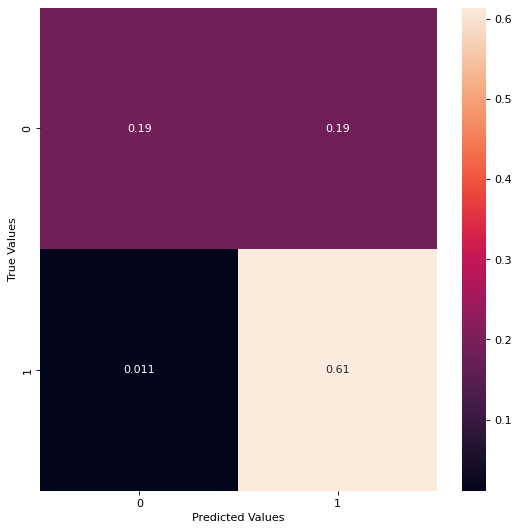

In [ ]:
classification_result(y_true, y_pred)
plt.savefig('drive/MyDrive/My_Data/Plots/05_Pneumonia_Classification.jpg')

In [ ]:
model_2 = Sequential( [
                     Conv2D(filters=10, kernel_size=3, activation ='relu', input_shape = (224,224,3))
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid')
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid')
                     , Flatten()
                     , Dense(units=30, activation='relu')
                     , Dropout(rate=0.3)
                     , Dense(units=1, activation='sigmoid')
])

model_2.compile(loss=BinaryCrossentropy()
                , optimizer=Adam()
                , metrics=['accuracy'])

history = model_2.fit(train_data
                    , validation_data=val_data
                    , epochs=10
                    , workers = 16
                    , use_multiprocessing=True
                    , steps_per_epoch=len(train_data)
                    , validation_steps = len(val_data))

model_2.save('drive/MyDrive/My_Data/My_Models/model_2.h5')
model_2 = load_model('drive/MyDrive/My_Data/My_Models/model_2.h5')

In [ ]:
model_2.evaluate(test_data)

20/20 [==============================] - 6s 266ms/step - loss: 1.8400 - accuracy: 0.7756


              precision    recall  f1-score   support

           0       0.97      0.41      0.58       234
           1       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



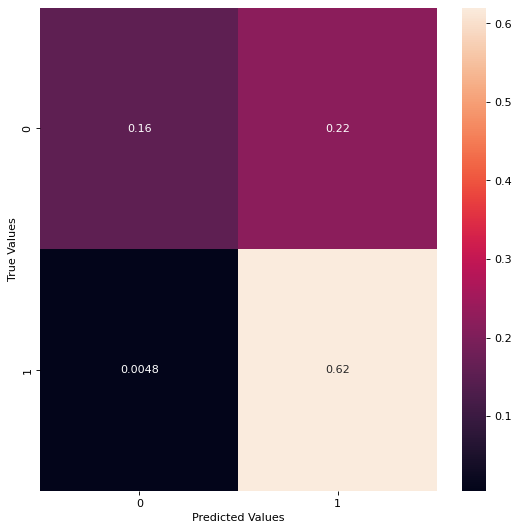

In [ ]:
y_true = test_data.classes[test_data.index_array]
y_pred = model_2.predict(test_data).round().reshape(y_true.shape)
classification_result(y_true, y_pred)
plt.savefig('drive/MyDrive/My_Data/Plots/06_Pneumonia_Classification.jpg')

In [ ]:
aug_train_datagen=ImageDataGenerator(rescale=1./255
                                 , rotation_range=0.1
                                 , width_shift_range=0.1
                                 , height_shift_range=0.1
                                 , shear_range=0.1
                                 , zoom_range=0.1
                                 , horizontal_flip=True
                                 , vertical_flip=True 
                                 )

aug_train_data = aug_train_datagen.flow_from_directory(directory=train_path
                                               , batch_size=32
                                               , target_size=(224,224)
                                               , class_mode='binary'
                                               , seed = seed)

Found 5216 images belonging to 2 classes.


In [ ]:
model_3 = Sequential( [
                     Conv2D(filters=10, kernel_size=3, activation ='relu', input_shape = (224,224,3))
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , Conv2D(filters=10, kernel_size=3, activation ='relu') 
                     , MaxPool2D(pool_size=2, padding='valid')
                     , Flatten()
                     , Dense(units=30, activation='relu')
                     , Dropout(rate=0.35)
                     , Dense(units=1, activation='sigmoid')
])

model_3.compile(loss=BinaryCrossentropy()
                , optimizer=Adam()
                , metrics=['accuracy'])

history = model_3.fit(aug_train_data
                    , validation_data=val_data
                    , epochs=10
                    , workers = 16
                    , use_multiprocessing=True
                    , steps_per_epoch=len(aug_train_data)
                    , validation_steps = len(val_data))

model_3.save('drive/MyDrive/My_Data/My_Models/model_3.h5')
model_3 = load_model('drive/MyDrive/My_Data/My_Models/model_3.h5')

In [ ]:
model_3.evaluate(test_data)

20/20 [==============================] - 5s 271ms/step - loss: 0.4885 - accuracy: 0.8189


[0.48851218819618225, 0.8189102411270142]

              precision    recall  f1-score   support

           0       0.90      0.58      0.71       234
           1       0.79      0.96      0.87       390

    accuracy                           0.82       624
   macro avg       0.85      0.77      0.79       624
weighted avg       0.83      0.82      0.81       624



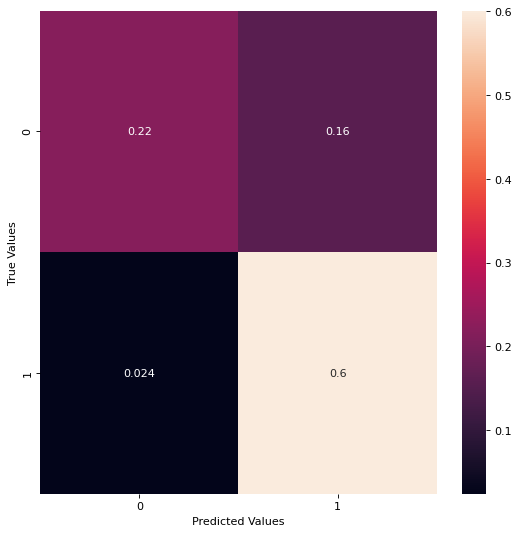

In [ ]:
y_true = test_data.classes[test_data.index_array]
y_pred = model_3.predict(test_data).round().reshape(y_true.shape)
classification_result(y_true, y_pred)
plt.savefig('drive/MyDrive/My_Data/Plots/06_Pneumonia_Classification.jpg')

In [ ]:
def create_model(model_url, num_classes=10):
  import tensorflow_hub as hub
  """
  Takse a tensorFlow Hub URL and create a Keras Sequential model with it 

  ARGS:
    model_url (str): A tensoflow hub feature extraction URL
    num_classes (int): Number of output neurons in the output layer
      Should be equal to the number of output classes, defautl 10

  Returns:
    An uncompiled Keras Sequntial model with model_url as features extractor
    Lyer and dense output layer with num_classes output neurons.
  """

  # Download the pretrained model and save it as a keras layer

  feature_extractor_layer = hub.KerasLayer(handle=model_url
                                           , trainable=False
                                           , name='feature_extraction_layer'
                                           , input_shape=IMAGE_SHAPE+(3,)) # freeze the already learned patterns

  # Create our model

  if num_classes > 2:
    output_layer = Dense(num_classes,activation='softmax', name='output_layer')
  
  elif num_classes ==2:
    output_layer = Dense(1,activation='sigmoid', name='output_layer')
  else:
    print("Number of classes not suported")

  model = Sequential([
                      feature_extractor_layer
                      , output_layer
  ])

  return model

In [ ]:
resnet = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientnet = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
model_4 = create_model(model_url=resnet, num_classes=2)
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
model_4.compile(loss=BinaryCrossentropy()
                , optimizer=Adam()
                , metrics=['accuracy'])

history = model_4.fit(aug_train_data
                    , validation_data=val_data
                    , epochs=10
                    , workers = 16
                    , use_multiprocessing=True
                    , steps_per_epoch=len(aug_train_data)
                    , validation_steps = len(val_data))

model_4.save('drive/MyDrive/My_Data/My_Models/model_4.h5')
model_4 = load_model('drive/MyDrive/My_Data/My_Models/model_4.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model_4.evaluate(test_data)

20/20 [==============================] - 19s 359ms/step - loss: 0.2926 - accuracy: 0.8926


[0.2926091253757477, 0.8926281929016113]

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       234
           1       0.86      0.99      0.92       390

    accuracy                           0.89       624
   macro avg       0.92      0.86      0.88       624
weighted avg       0.90      0.89      0.89       624



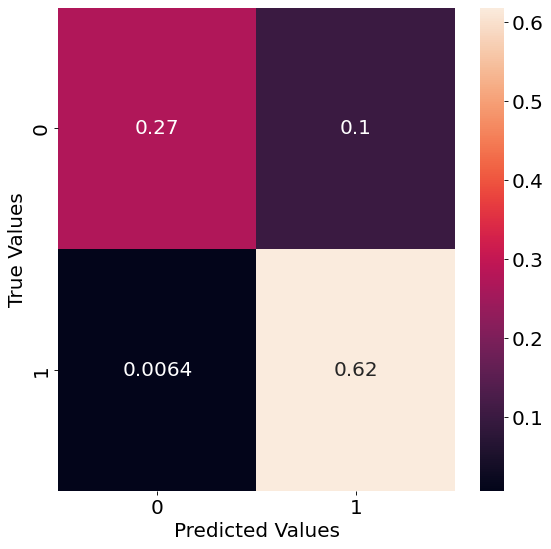

In [ ]:
y_true = test_data.classes[test_data.index_array]
y_pred = model_4.predict(test_data).round().reshape(y_true.shape)
classification_result(y_true, y_pred)
plt.rc('font', size=18) 
plt.savefig('drive/MyDrive/My_Data/Plots/07_Pneumonia_Classification.jpg')

In [ ]:
model_5 = create_model(model_url=efficientnet, num_classes=2)
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
model_5.compile(loss=BinaryCrossentropy()
                , optimizer=Adam()
                , metrics=['accuracy'])

history = model_5.fit(aug_train_data
                    , validation_data=val_data
                    , epochs=10
                    , workers = 16
                    , use_multiprocessing=True
                    , steps_per_epoch=len(aug_train_data)
                    , validation_steps = len(val_data))

model_5.save('drive/MyDrive/My_Data/My_Models/model_5.h5')
model_5 = load_model('drive/MyDrive/My_Data/My_Models/model_5.h5', custom_objects={'KerasLayer':hub.KerasLayer})

Epoch 1/10
163/163 [==============================] - 120s 626ms/step - loss: 0.3138 - accuracy: 0.8602 - val_loss: 0.4438 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 105s 591ms/step - loss: 0.1951 - accuracy: 0.9252 - val_loss: 0.2734 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 106s 605ms/step - loss: 0.1667 - accuracy: 0.9377 - val_loss: 0.2863 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 104s 590ms/step - loss: 0.1449 - accuracy: 0.9467 - val_loss: 0.2178 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 106s 602ms/step - loss: 0.1343 - accuracy: 0.9526 - val_loss: 0.2136 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 106s 594ms/step - loss: 0.1286 - accuracy: 0.9546 - val_loss: 0.1814 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 107s 604ms/step - loss: 0.1206 - accuracy: 0.9565 - val_loss: 0.1628 -

In [ ]:
model_5.evaluate(test_data)

20/20 [==============================] - 6s 303ms/step - loss: 0.3269 - accuracy: 0.8654


[0.32685816287994385, 0.8653846383094788]

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       234
           1       0.84      0.98      0.90       390

    accuracy                           0.87       624
   macro avg       0.89      0.83      0.85       624
weighted avg       0.88      0.87      0.86       624



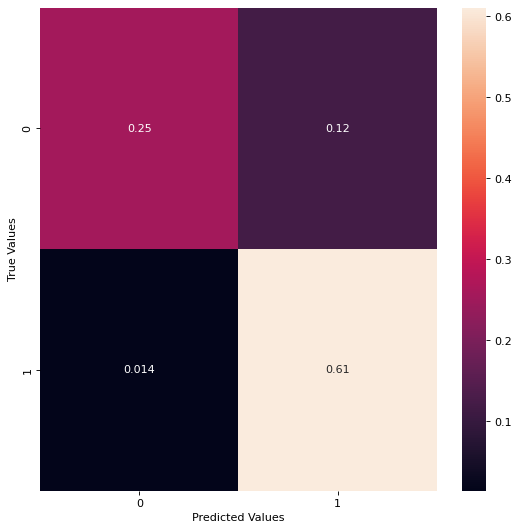

In [ ]:
y_true = test_data.classes[test_data.index_array]
y_pred = model_5.predict(test_data).round().reshape(y_true.shape)
classification_result(y_true, y_pred)
plt.savefig('drive/MyDrive/My_Data/Plots/08_Pneumonia_Classification.jpg')